In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

Using TensorFlow backend.


In [0]:
inp_data = pd.read_csv('Pokemon.csv')

In [0]:
inp_data = inp_data.drop(['Type 2'], axis = 1)

In [0]:
inp_data['Legendary'] *= 1

In [5]:
inp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 11 columns):
Name          634 non-null object
Type 1        634 non-null object
Total         634 non-null int64
HP            634 non-null int64
Attack        634 non-null int64
Defense       634 non-null int64
Sp. Atk       634 non-null int64
Sp. Def       634 non-null int64
Speed         634 non-null int64
Generation    634 non-null int64
Legendary     634 non-null int64
dtypes: int64(9), object(2)
memory usage: 54.6+ KB


In [0]:
inp_data = inp_data.drop(['Name'], axis = 1)
inp_data = inp_data.drop(['Generation'], axis = 1)
inp_data = inp_data.drop(['Legendary'], axis = 1)
lb_make = LabelEncoder()
inp_data['Type 1'] = lb_make.fit_transform(inp_data['Type 1'])
target = inp_data['Type 1']

In [0]:
target = pd.get_dummies(target, drop_first = True)

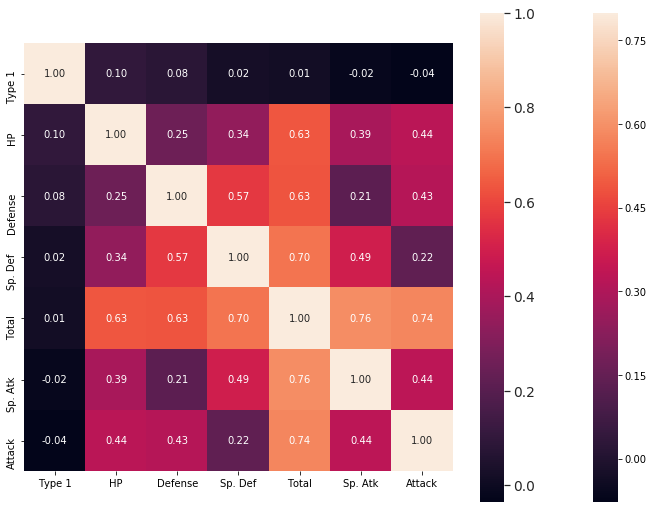

In [8]:
corrmat = inp_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
k = 7 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Type 1')['Type 1'].index
cm = np.corrcoef(inp_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [0]:
X_inp = inp_data.drop(['Total'], axis = 1)
X_inp = X_inp.drop(['Type 1'], axis = 1)

In [10]:
X_inp.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,65,49,65,45
1,60,62,80,63,80,60
2,80,82,100,83,100,80
3,39,52,43,60,50,65
4,58,64,58,80,65,80


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X_inp, target, test_size = 0.30, random_state = 0)
# scale_X = StandardScaler()
# X_train = scale_X.fit_transform(X_train)
# X_test = scale_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)

In [12]:
print(accuracy_score(Y_test, pred))

0.12041884816753927


In [14]:
# create model
model = Sequential()
model.add(Dense(634, input_dim = X_inp.shape[1], activation = 'relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(target.shape[1], activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
# Fit the model
model.fit(X_train, Y_train, epochs=150, batch_size=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/150
443/443 [==============================] - 0s 843us/step - loss: 0.5400 - acc: 0.9039
Epoch 2/150
443/443 [==============================] - 0s 223us/step - loss: 0.2392 - acc: 0.9410
Epoch 3/150
443/443 [==============================] - 0s 228us/step - loss: 0.2192 - acc: 0.9428
Epoch 4/150
443/443 [==============================] - 0s 230us/step - loss: 0.2108 - acc: 0.9462
Epoch 5/150
443/443 [==============================] - 0s 243us/step - loss: 0.2075 - acc: 0.9452
Epoch 6/150
443/443 [==============================] - 0s 221us/step - loss: 0.1974 - acc: 0.9473
Epoch 7/150
443/443 [==============================] - 0s 223us/step - loss: 0.2009 - acc: 0.9461
Epoch 8/150
443/443 [==============================] - 0s 249us/step - loss: 0.1946 - acc: 0.9460
Epoch 9/150
443/443 [==============================] - 0s 217us/step - loss: 0.1974 - acc: 0.9462
Epoch 10/150
443/443 [==============================] - 0s 222us/step 

In [17]:
# evaluate the model
scores = model.evaluate(X_train, Y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

443/443 [==============================] - 0s 123us/step

acc: 96.56%
